>## MoonLight Energy Solutions for benin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from windrose import WindroseAxes
import os 
os.chdir('..')

>>### load Benin-malanville.

In [2]:
data = pd.read_csv("./data/benin-malanville.csv")

>>### verify loaded data

In [3]:
data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


>>#### provides a quick overview of a DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

>>#### Summary statistics help us understand the distribution and central tendencies of the data.

In [5]:

data.drop(columns='Comments').describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


>>### mising value

In [6]:
missing_values = data.isnull().sum()
missing_values.all

<bound method Series.all of Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64>

>>### remove missing value

In [7]:
data = data.drop(columns='Comments')
data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4


>>### detect outlier


In [8]:
def detectOutliers(data):
    outlier = {}
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)

            IQR = Q3 - Q1

            lowerBound = Q1-1.5*IQR
            upperBound = Q3+1.5*IQR

            outlierCondition = (data[column] < lowerBound) | (data[column] > upperBound)
            outlier[column] = data[column][outlierCondition].values
    return outlier

outliers = detectOutliers(data)

>>### graph before outliers removed

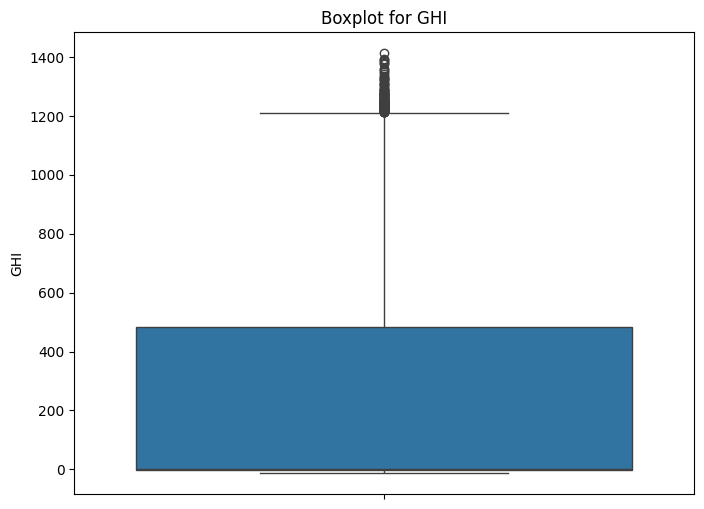

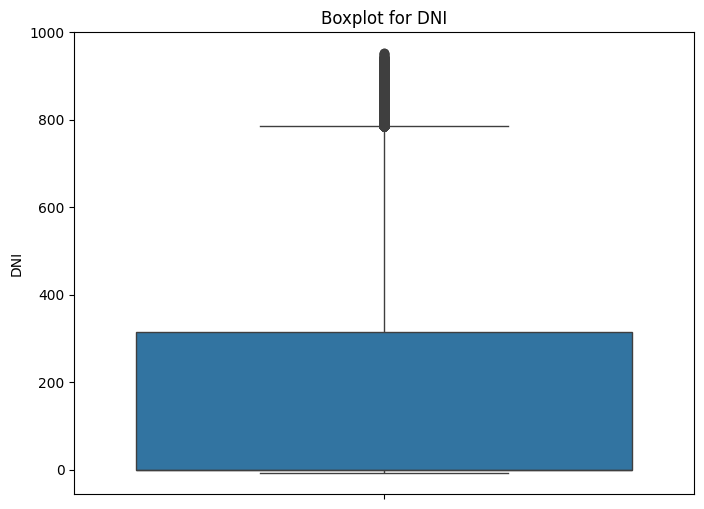

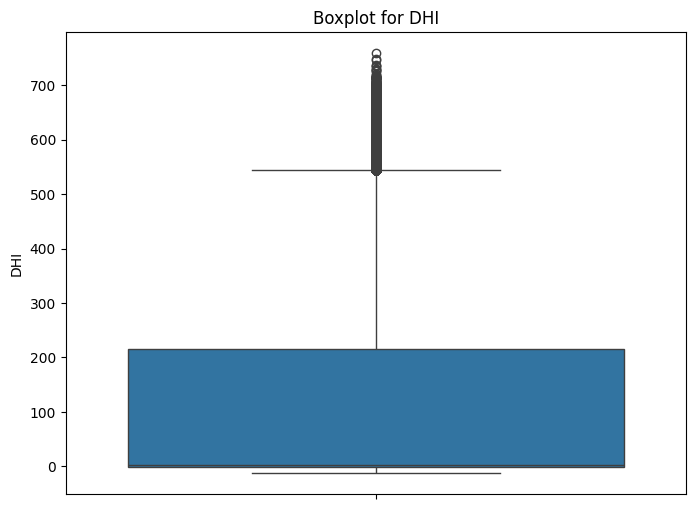

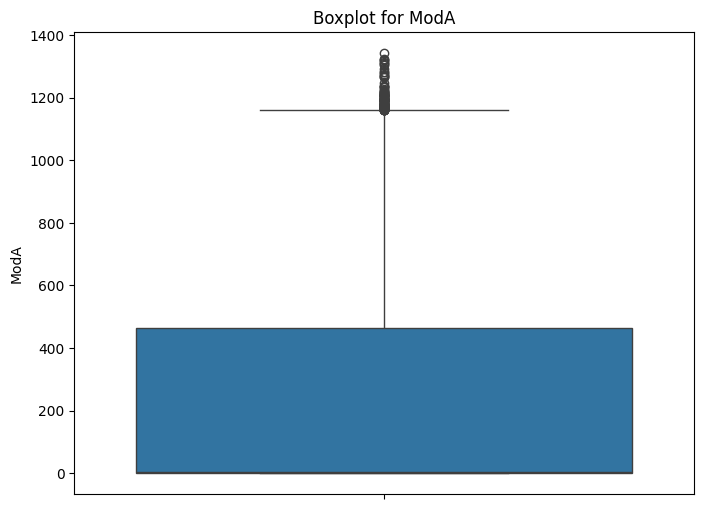

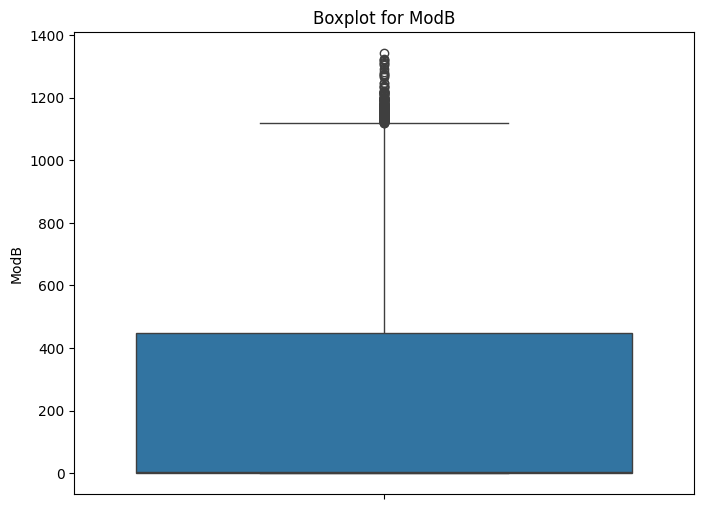

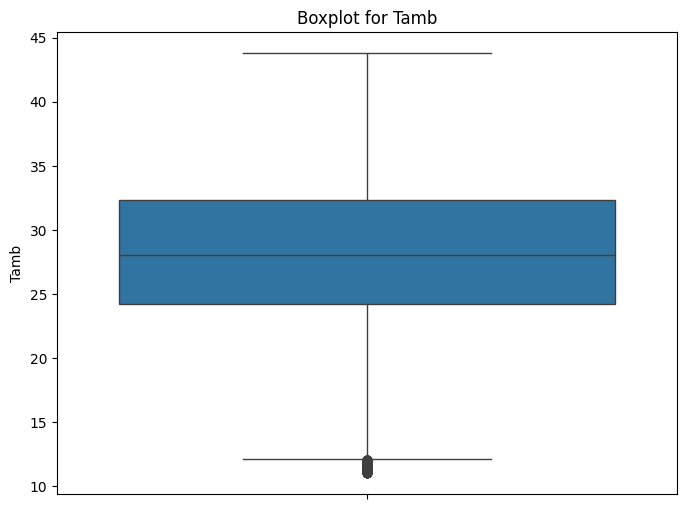

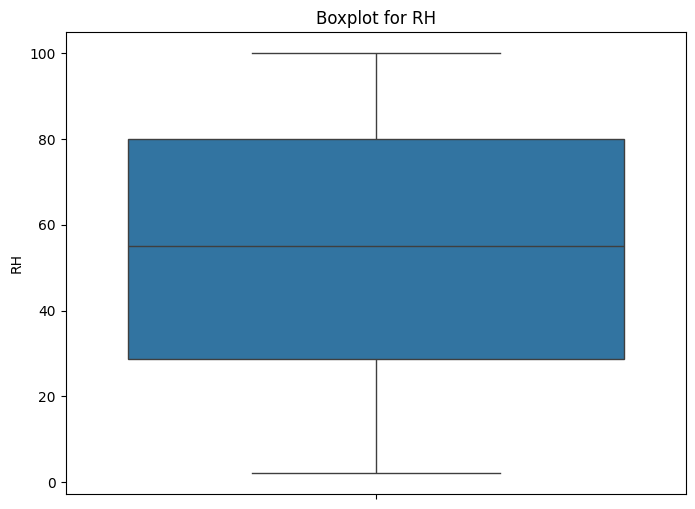

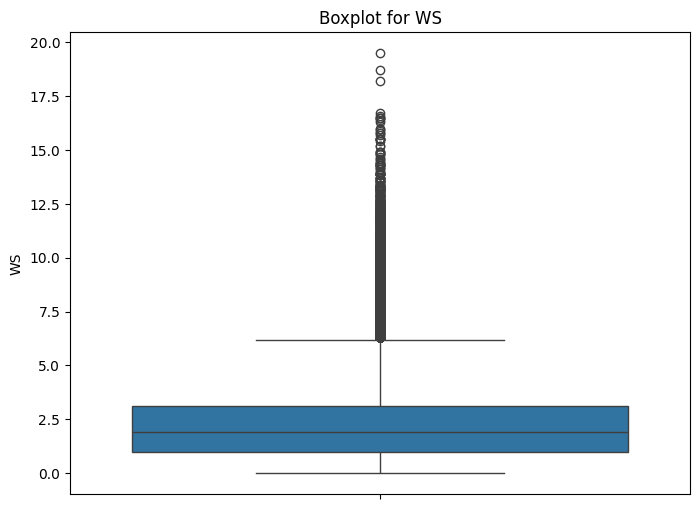

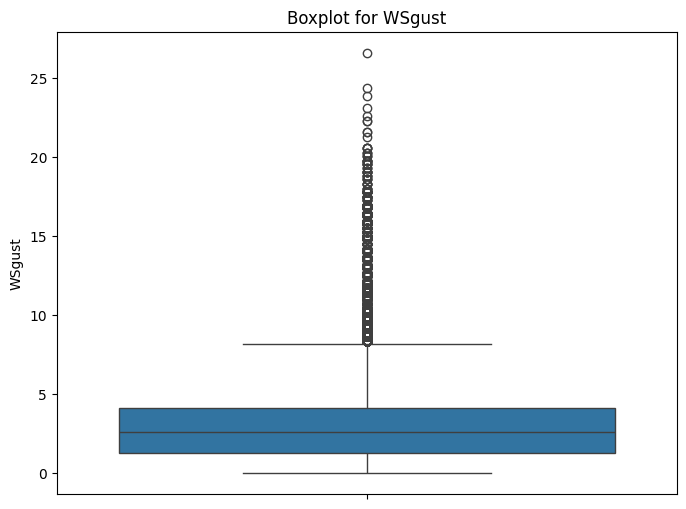

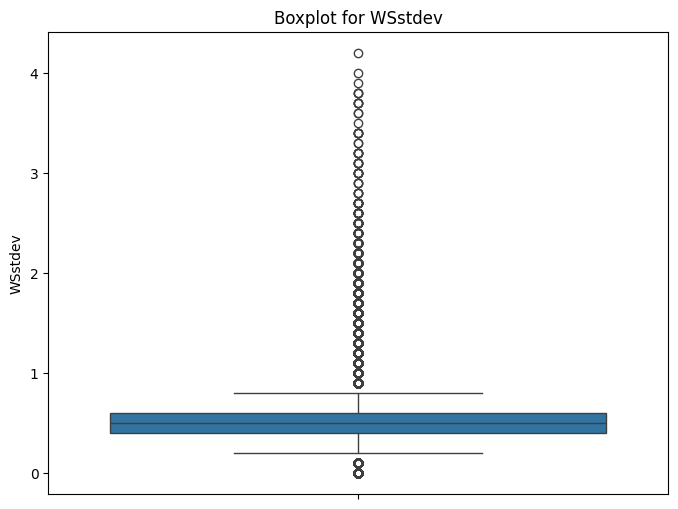

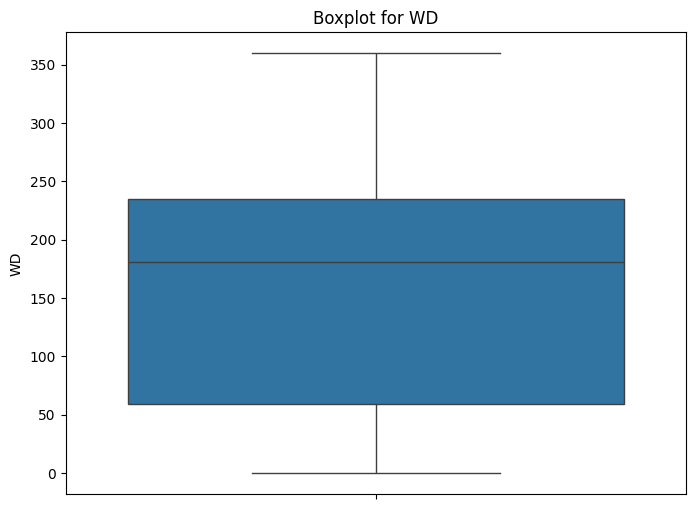

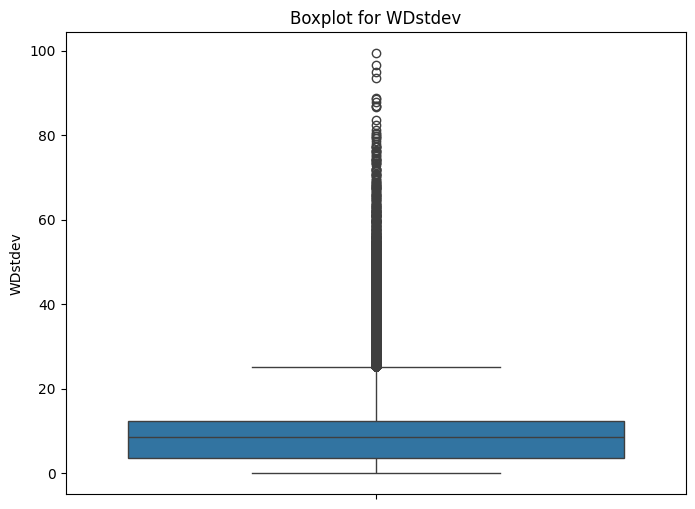

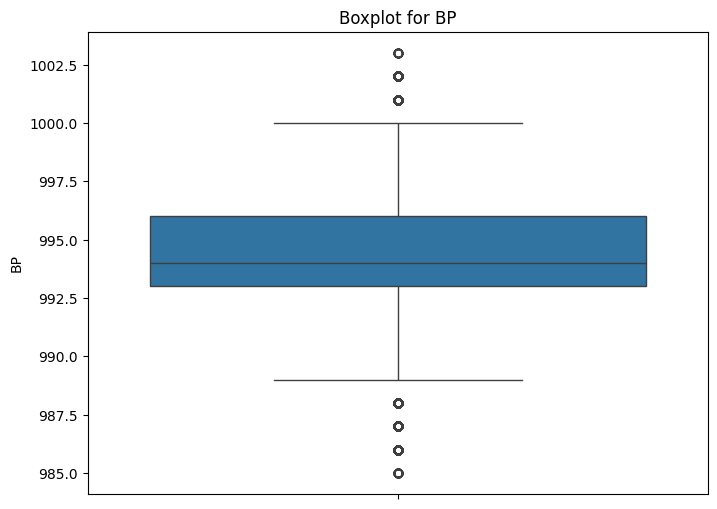

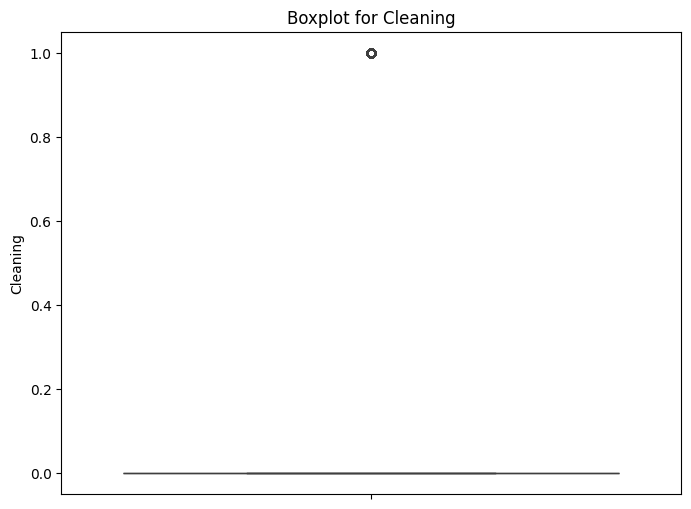

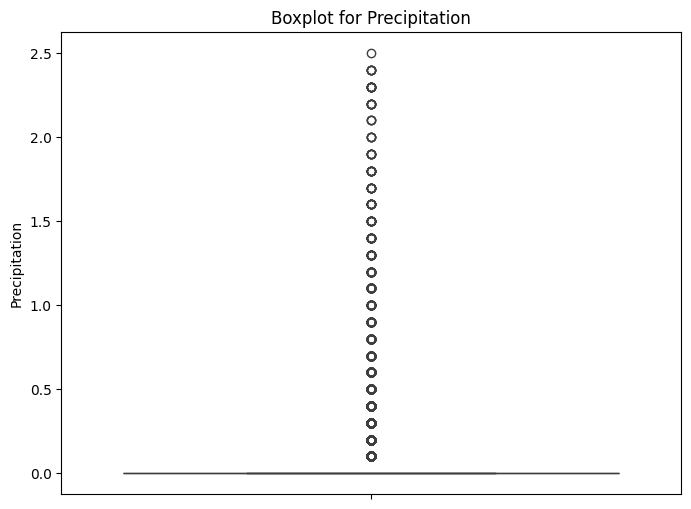

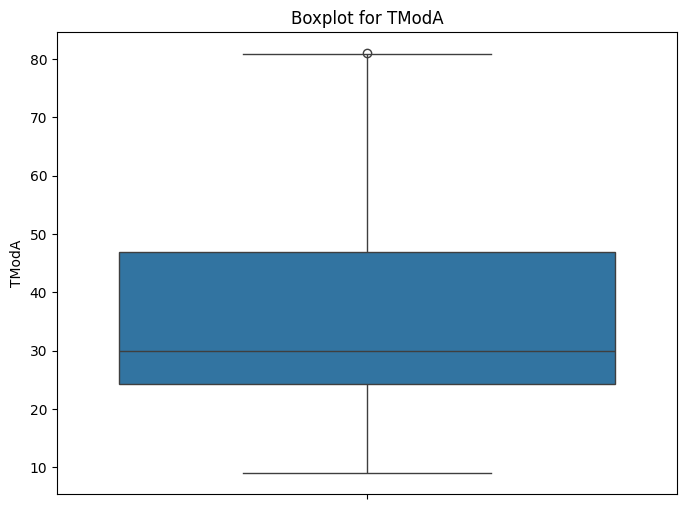

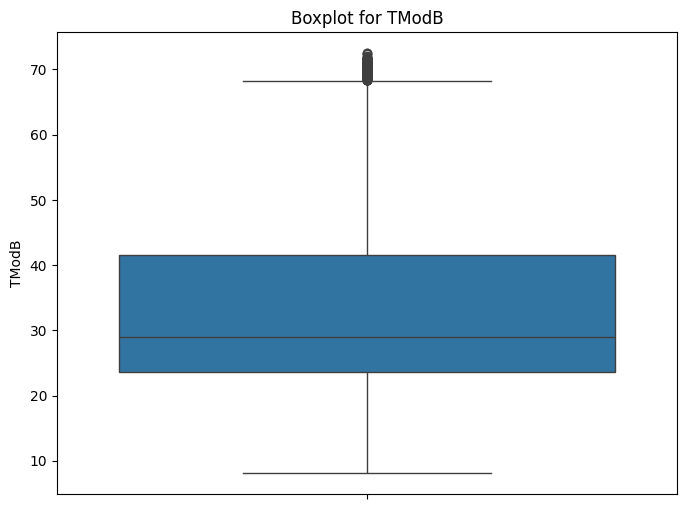

In [9]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):  # Check if column is numeric
        plt.figure(figsize=(8, 6))
        
        # Drop missing values for the column
        column_data = data[column].dropna()
        
        if not column_data.empty:  # Ensure there's data to plot
        
            sns.boxplot(y=column_data)
            plt.title(f"Boxplot for {column}")

        if column in outliers:
            plt.show()
        else:
            print(f"Skipping column {column}: No data to plot after handling NaNs.")

>>>#### check value count if their outliers must be removed or not

In [10]:
data['Cleaning'].value_counts().count

<bound method Series.count of Cleaning
0    525115
1       485
Name: count, dtype: int64>

In [11]:
data['Precipitation'].value_counts().count

<bound method Series.count of Precipitation
0.0    521811
0.1      2387
0.2       480
0.3       205
0.4       127
0.5       107
0.6        96
0.7        69
0.8        57
1.1        44
0.9        41
1.2        30
1.0        30
1.4        20
1.3        20
1.5        13
2.3        10
1.6        10
1.8         9
1.7         8
2.2         7
1.9         6
2.4         5
2.0         4
2.1         3
2.5         1
Name: count, dtype: int64>

>>### Remove Outliers

In [12]:
def removeOutliers(data, columns, exclude_column="Cleaning"):
    cleanedData = data.copy()
    
    for column in columns:
        if column == exclude_column:
            continue  # Skip the 'Cleaning' column
        
        Q1 = cleanedData[column].quantile(0.25)  # First quartile
        Q3 = cleanedData[column].quantile(0.75)  # Third quartile
        
        IQR = Q3 - Q1  # Interquartile range
        
        lowerBound = Q1 - 1.5 * IQR
        upperBound = Q3 + 1.5 * IQR
        
        # Clip the outliers to within bounds
        cleanedData[column] = cleanedData[column].clip(lowerBound, upperBound)
    return cleanedData

# List of numeric columns to process (excluding non-numeric or irrelevant ones)
numericColumns = data.select_dtypes(include=['number']).columns.tolist()

# Remove outliers from all numeric columns except 'Cleaning'
data = removeOutliers(data, numericColumns, exclude_column="Cleaning")


>> ### Graph after removing outliers

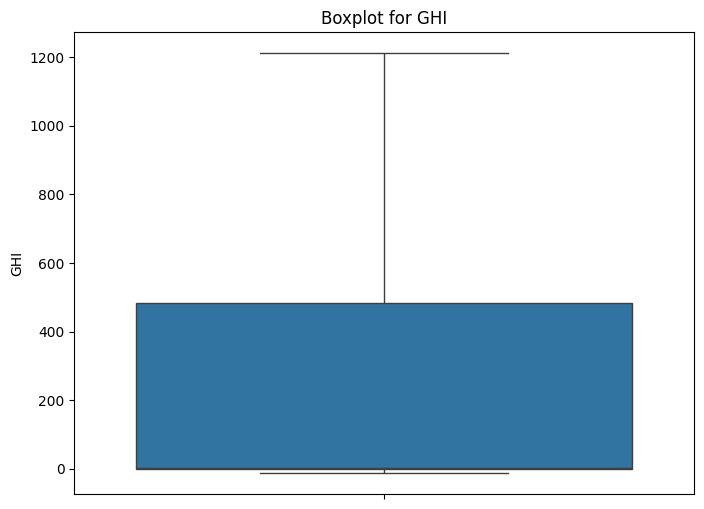

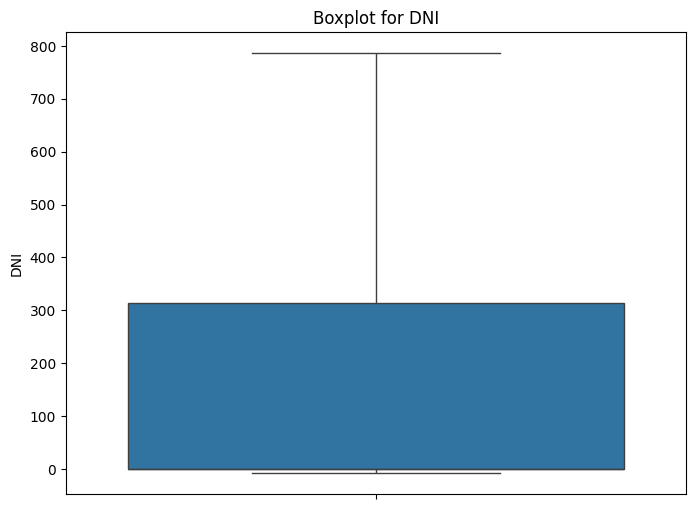

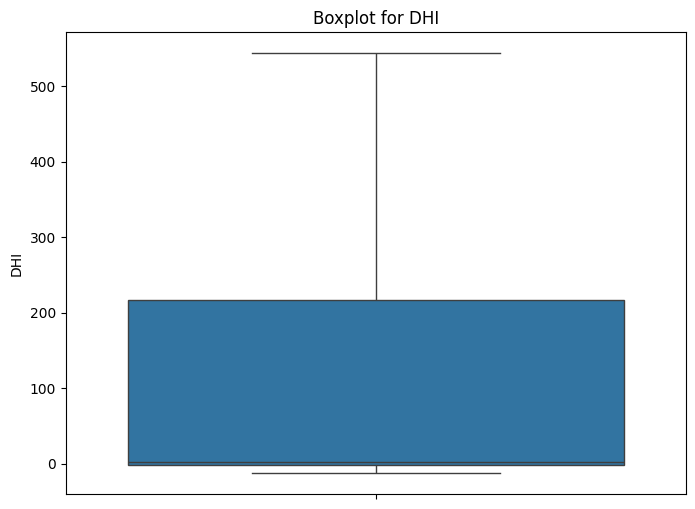

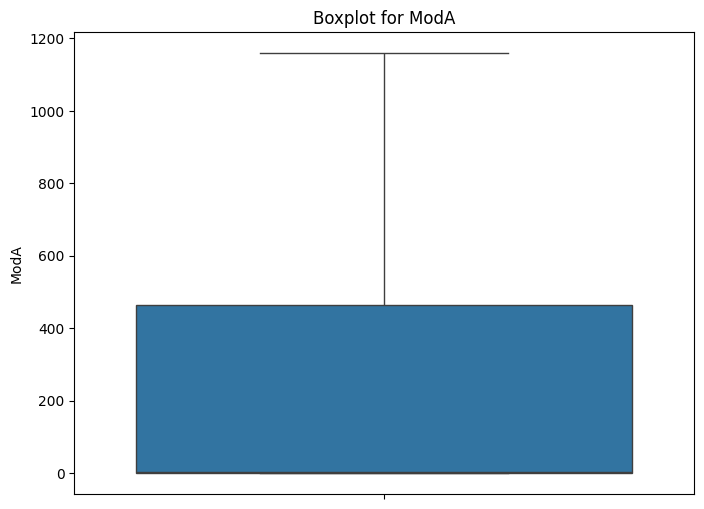

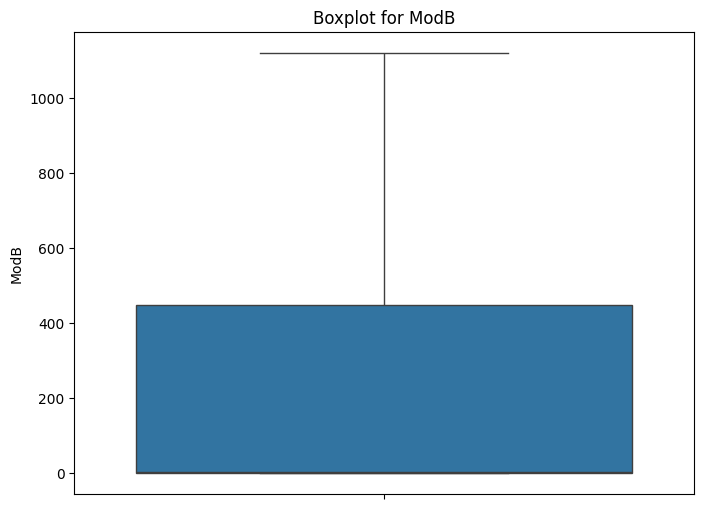

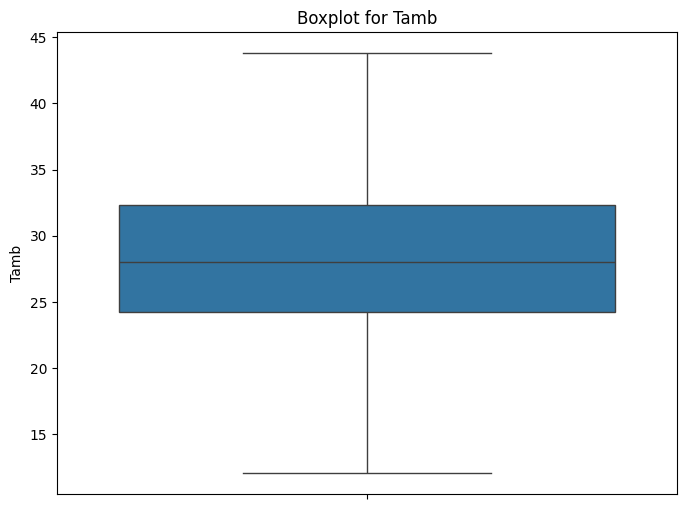

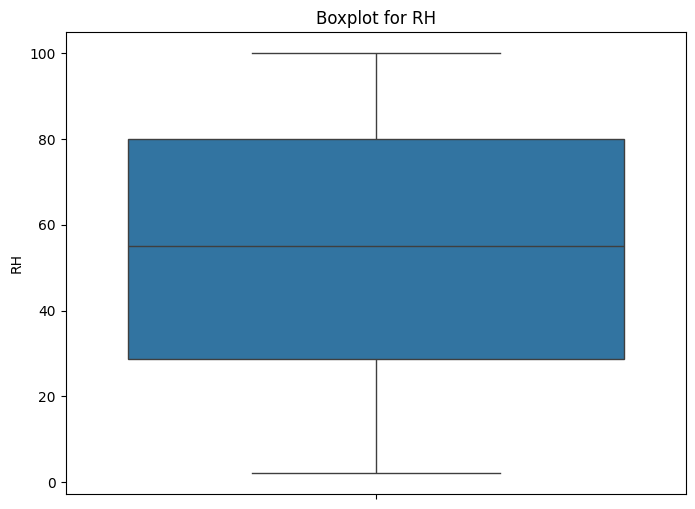

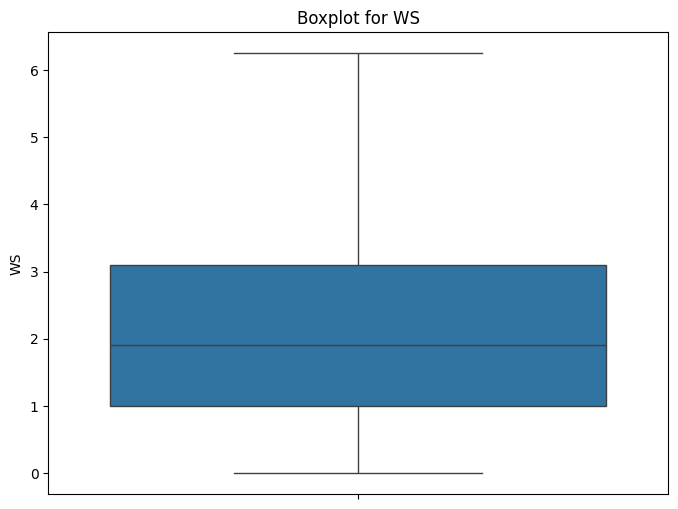

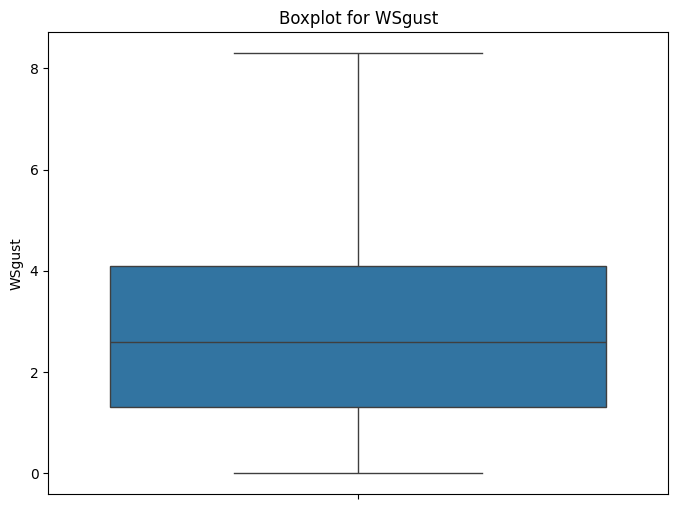

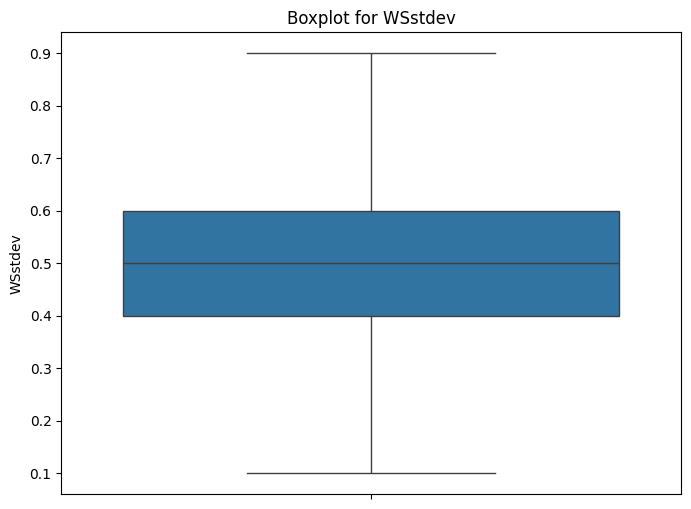

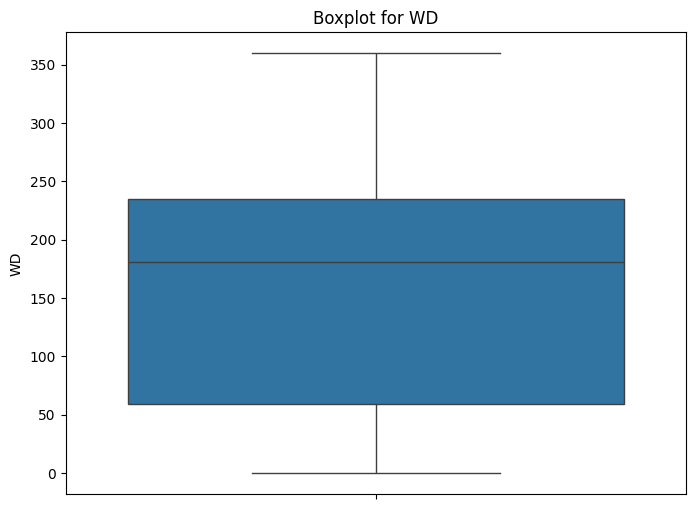

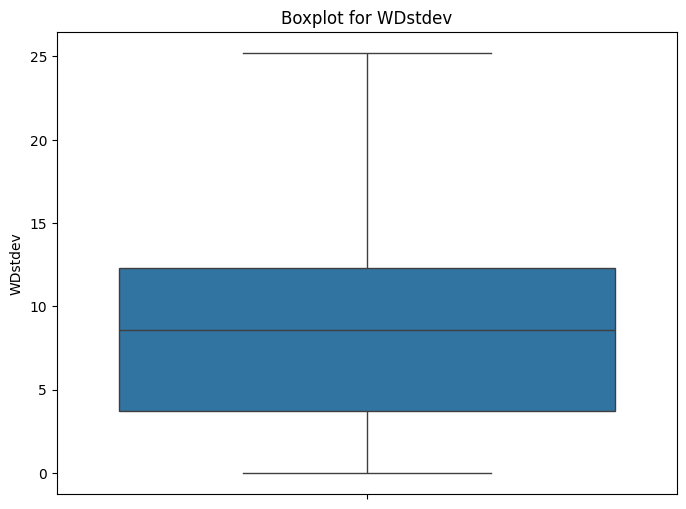

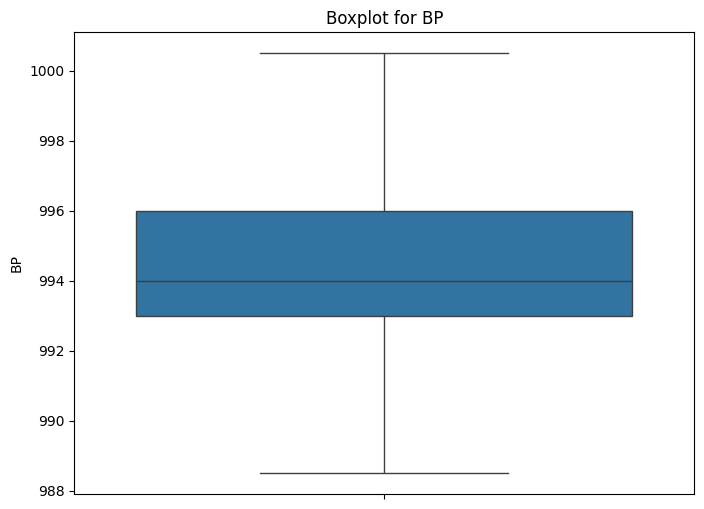

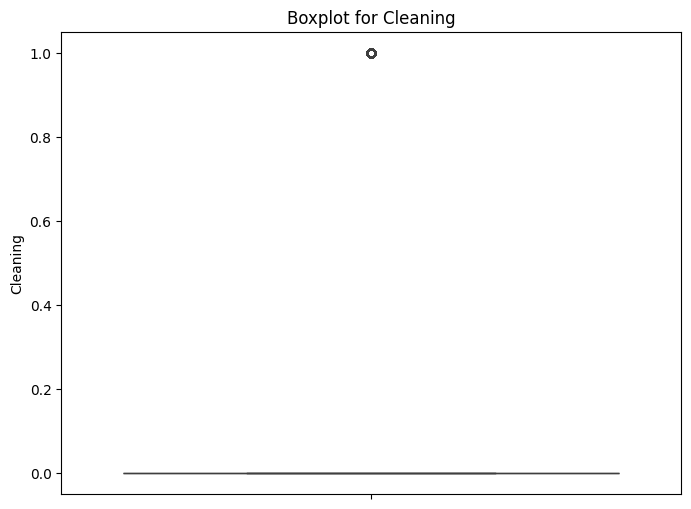

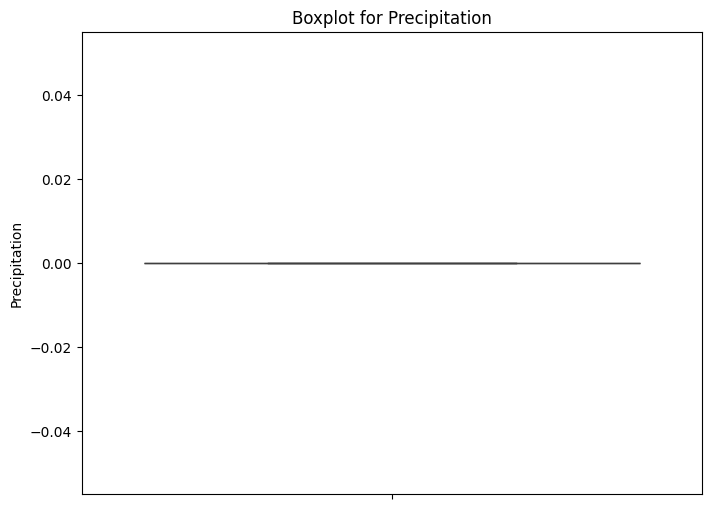

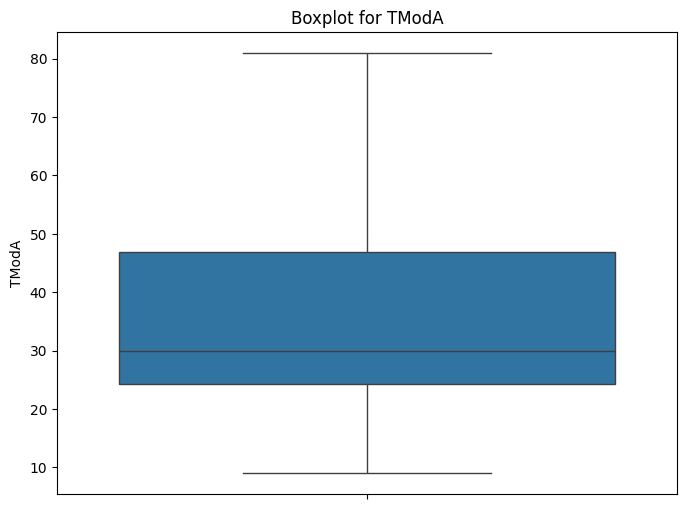

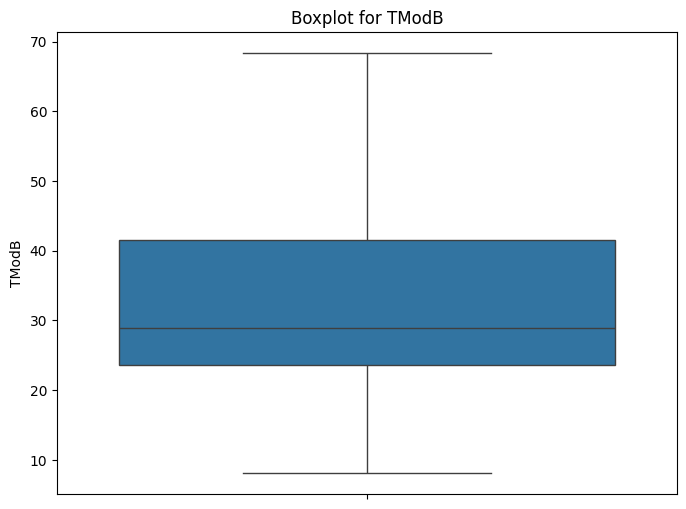

In [13]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):  # Check if column is numeric
        plt.figure(figsize=(8, 6))
        
        # Drop missing values for the column
        column_data = data[column].dropna()
        
        if not column_data.empty:  # Ensure there's data to plot
        
            sns.boxplot(y=column_data)
            plt.title(f"Boxplot for {column}")

        if column in outliers:
            plt.show()
        else:
            print(f"Skipping column {column}: No data to plot after handling NaNs.")

>> ### Columns that must be positive:
GHI, DNI, DHI, ModA, ModB, WS, WSgust, WSstdev, BP, Precipitation


>> ##### checking incorrect entries (e.g., negative values where only positive should exist),

In [14]:
positiveColumns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'WSstdev', 'BP', 'Precipitation']

incorrectEntries = data[positiveColumns][data[positiveColumns] < 0]

print(incorrectEntries)

        GHI  DNI  DHI  ModA  ModB  WS  WSgust  WSstdev  BP  Precipitation
0      -1.2 -0.2 -1.1   NaN   NaN NaN     NaN      NaN NaN            NaN
1      -1.1 -0.2 -1.1   NaN   NaN NaN     NaN      NaN NaN            NaN
2      -1.1 -0.2 -1.1   NaN   NaN NaN     NaN      NaN NaN            NaN
3      -1.1 -0.1 -1.0   NaN   NaN NaN     NaN      NaN NaN            NaN
4      -1.0 -0.1 -1.0   NaN   NaN NaN     NaN      NaN NaN            NaN
...     ...  ...  ...   ...   ...  ..     ...      ...  ..            ...
525595 -5.5 -0.1 -5.9   NaN   NaN NaN     NaN      NaN NaN            NaN
525596 -5.5 -0.1 -5.8   NaN   NaN NaN     NaN      NaN NaN            NaN
525597 -5.5 -0.1 -5.8   NaN   NaN NaN     NaN      NaN NaN            NaN
525598 -5.5 -0.1 -5.8   NaN   NaN NaN     NaN      NaN NaN            NaN
525599 -5.5 -0.1 -5.7   NaN   NaN NaN     NaN      NaN NaN            NaN

[525600 rows x 10 columns]


>>> ##### negative ratio of 'DHI', 'DNI', 'GHI'

In [15]:
columnsToCheck = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'WSstdev', 'BP', 'Precipitation']

# Calculate the proportion of negative values in each column
negativeRatio = (data[columnsToCheck] < 0).mean()

# Print the proportion of negative values for each column
for column, ratio in negativeRatio.items():
    print(f"Proportion of negative values in {column}: {ratio:.2%}")

# Print descriptive statistics for the columns
print(data[columnsToCheck].describe())


Proportion of negative values in GHI: 49.25%
Proportion of negative values in DNI: 52.51%
Proportion of negative values in DHI: 49.31%
Proportion of negative values in ModA: 0.00%
Proportion of negative values in ModB: 0.00%
Proportion of negative values in WS: 0.00%
Proportion of negative values in WSgust: 0.00%
Proportion of negative values in WSstdev: 0.00%
Proportion of negative values in BP: 0.00%
Proportion of negative values in Precipitation: 0.00%
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.546539     165.752317     114.559250     236.580515   
std       331.091664     258.084883     156.318093     326.868261   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     46

>> ### replace negative values with zero(0)

In [16]:
# Columns to clean
columnsToClean = ['DHI', 'DNI', 'GHI']

# Step 1: Replace negative values with zero
data[columnsToClean] = data[columnsToClean].apply(lambda col: col.map(lambda x: max(x, 0)))

# Step 2: Validate the changes
# Confirm no negative values remain
print((data[columnsToClean] < 0).sum())  # Should return 0 for all columns

# Summarize the cleaned data
print(data[columnsToClean].describe())


DHI    0
DNI    0
GHI    0
dtype: int64
                 DHI            DNI            GHI
count  525600.000000  525600.000000  525600.000000
mean      116.193322     166.006667     241.945907
std       155.080282     257.921040     330.062055
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         1.600000       0.000000       1.800000
75%       216.300000     314.200000     483.400000
max       543.900000     786.250000    1211.500000


>> ## Time Series Analysis:

In [17]:
# Convert 'Timestamp' column to datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Add columns for month and hour for analysis
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour

>>>> #### plot by monthly trend 

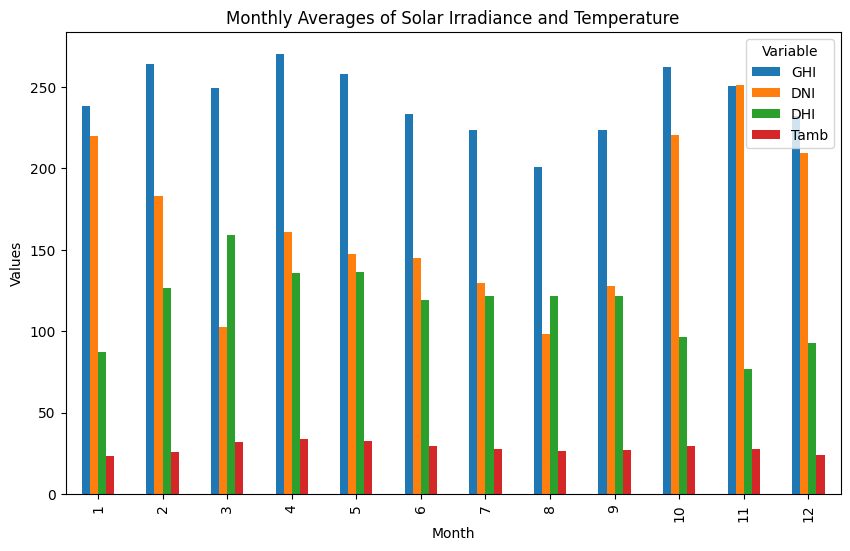

In [18]:
# Group by month and calculate the mean
monthly_data = data.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot monthly trends
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Averages of Solar Irradiance and Temperature')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(title='Variable')
plt.show()


>>> #### plot daily trends

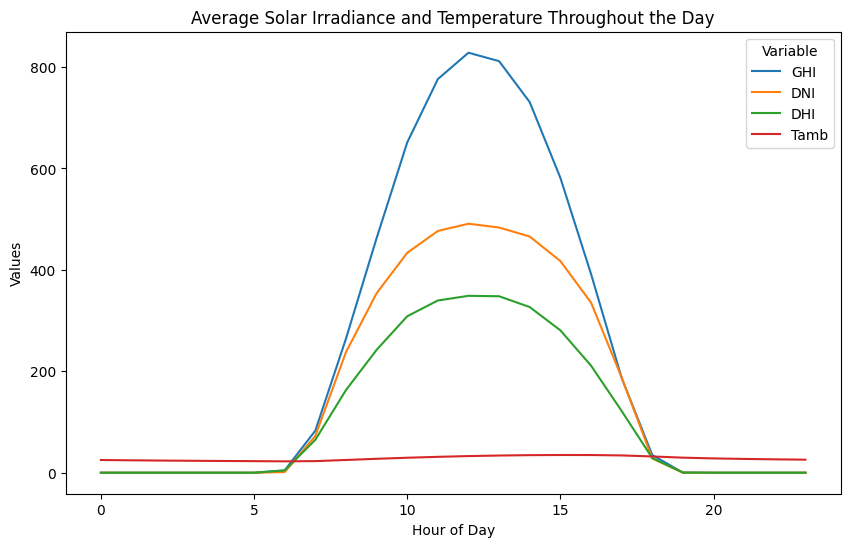

In [19]:
# Group by hour and calculate the mean
hourly_data = data.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot daily trends
hourly_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Solar Irradiance and Temperature Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Values')
plt.legend(title='Variable')
plt.show()


>>> #### Compare Sensor Readings Before and After Cleaning

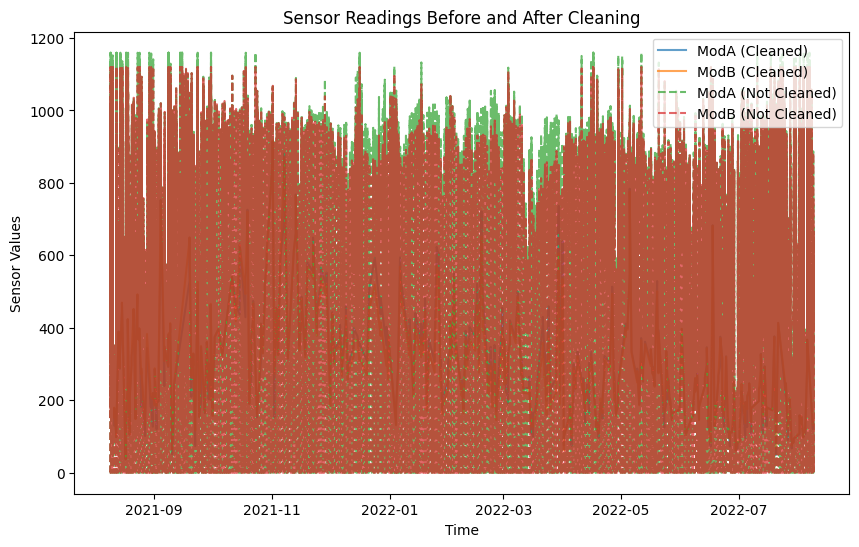

In [20]:
# Separate data into cleaned and uncleaned periods
cleaned = data[data['Cleaning'] == 1]
not_cleaned = data[data['Cleaning'] == 0]

# Plot sensor readings
plt.figure(figsize=(10, 6))
plt.plot(cleaned['Timestamp'], cleaned['ModA'], label='ModA (Cleaned)', alpha=0.7)
plt.plot(cleaned['Timestamp'], cleaned['ModB'], label='ModB (Cleaned)', alpha=0.7)
plt.plot(not_cleaned['Timestamp'], not_cleaned['ModA'], label='ModA (Not Cleaned)', linestyle='--', alpha=0.7)
plt.plot(not_cleaned['Timestamp'], not_cleaned['ModB'], label='ModB (Not Cleaned)', linestyle='--', alpha=0.7)
plt.title('Sensor Readings Before and After Cleaning')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()

>>> #### Highlight Anomalies

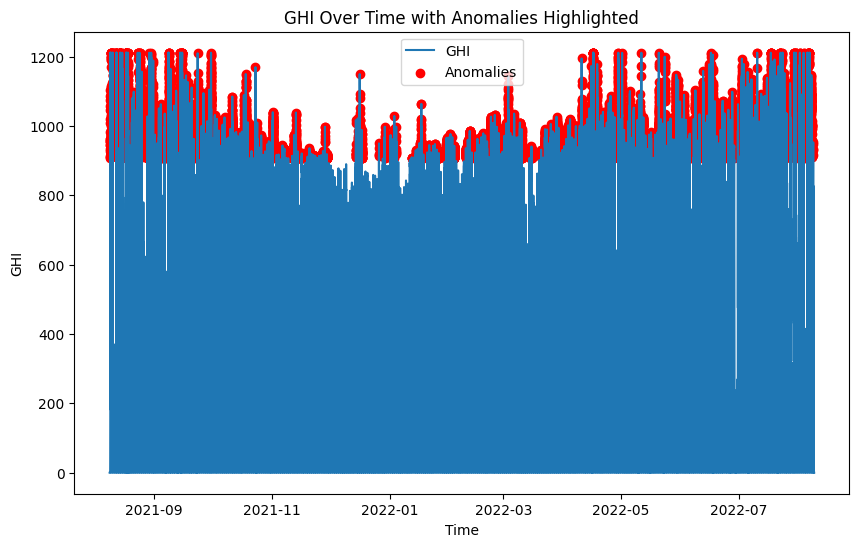

In [21]:
# Identify anomalies (e.g., values above 95th percentile)
ghi_threshold = data['GHI'].quantile(0.95)
anomalies = data[data['GHI'] > ghi_threshold]

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['GHI'], label='GHI')
plt.scatter(anomalies['Timestamp'], anomalies['GHI'], color='red', label='Anomalies')
plt.title('GHI Over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()
plt.show()


>>### Correlation Analysis involves identifying relationships between variables.

>>>##### Select relevant columns for analysis

In [22]:
# Select relevant columns for analysis
columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
dataCorr = data[columns]

>>##### Correlation Matrix and Heatmap

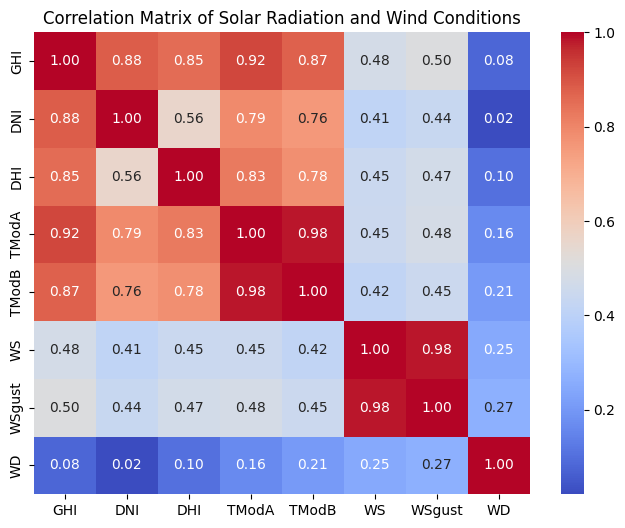

In [23]:
# Compute correlation matrix
correlation_matrix = dataCorr.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Solar Radiation and Wind Conditions")
plt.show()


>> ### Wind Analysis

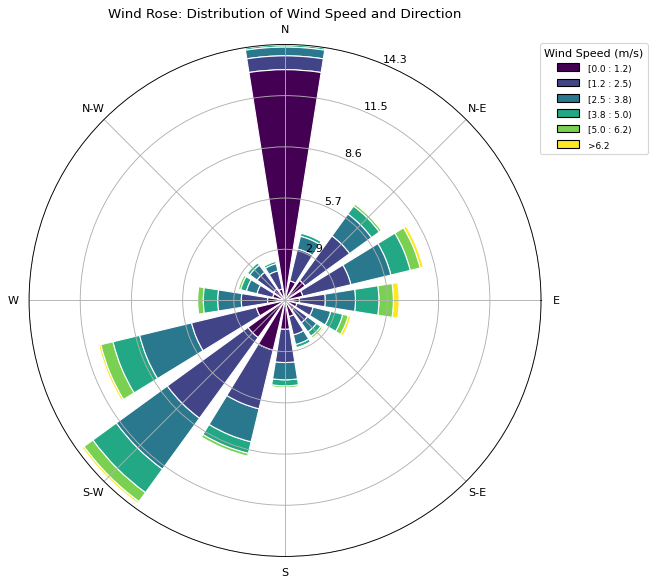

Average Wind Direction Variability (Standard Deviation): 8.49°


In [24]:
# Check if the required columns exist
required_columns = ['WS', 'WD', 'WDstdev']
if all(col in data.columns for col in required_columns):
    # Drop rows with missing or invalid values
    wind_data = data.dropna(subset=['WS', 'WD'])
    
    # Ensure wind direction is within 0–360 degrees
    wind_data = wind_data[(wind_data['WD'] >= 0) & (wind_data['WD'] <= 360)]
    
    # Create a wind rose
    ax = WindroseAxes.from_ax()
    ax.bar(
        wind_data['WD'], 
        wind_data['WS'], 
        normed=True, 
        opening=0.8, 
        edgecolor='white'
    )
    ax.set_legend(title="Wind Speed (m/s)", loc="upper left", bbox_to_anchor=(1, 1))

    # Add title
    plt.title("Wind Rose: Distribution of Wind Speed and Direction")
    plt.show()

    # Analyze Wind Variability
    variability_mean = wind_data['WDstdev'].mean()
    print(f"Average Wind Direction Variability (Standard Deviation): {variability_mean:.2f}°")
else:
    print("Dataset must contain 'WS', 'WD', and 'WDstdev' columns.")


>> ### Temprature Analysis

>> #### Scatter Plot Relative Humidity vs Temperature

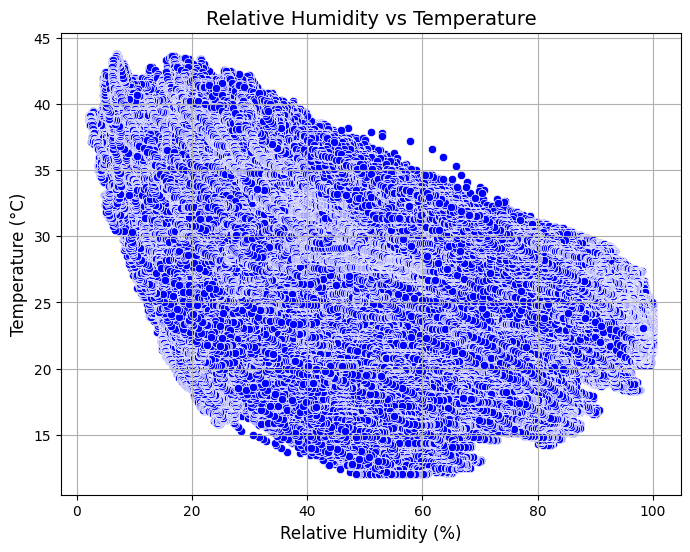

In [25]:
from scripts.scatterPlot import plot_scatter_or_regression


TempData = data.dropna(subset=['RH', 'Tamb', 'GHI'])

plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='Tamb',
    title='Relative Humidity vs Temperature',
    x_label='Relative Humidity (%)',
    y_label='Temperature (°C)',
    color='blue',
    regression=False  # No regression line
)


>> #### scatter Plot: RH vs Solar Radiation

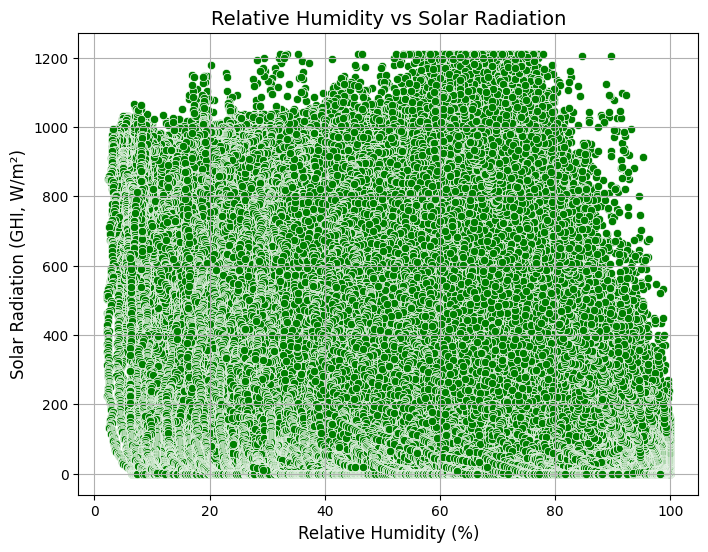

In [26]:
plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='GHI',
    title='Relative Humidity vs Solar Radiation',
    x_label='Relative Humidity (%)',
    y_label='Solar Radiation (GHI, W/m²)',
    color='green',
    regression=False  # No regression line
)


>> #### Regression Plot: RH vs Temperature

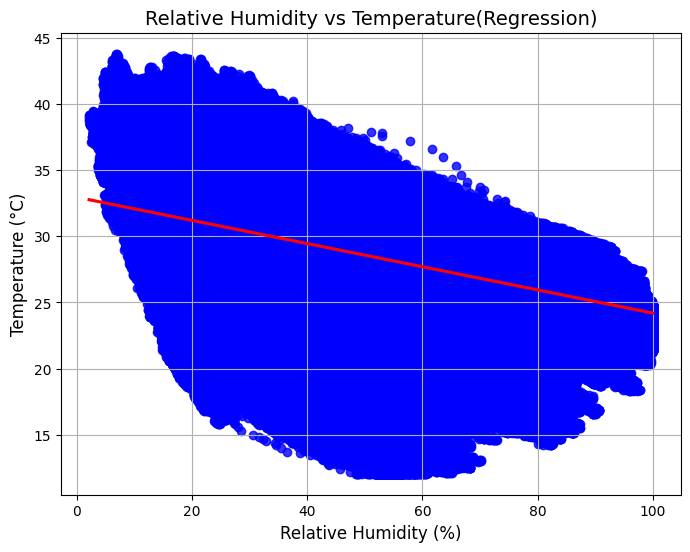

In [27]:
plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='Tamb',
    title='Relative Humidity vs Temperature(Regression)',
    x_label='Relative Humidity (%)',
    y_label='Temperature (°C)',
    color='blue',
    regression=True  # No regression line
)


>> #### Regression Plot: RH vs Solar Radiation

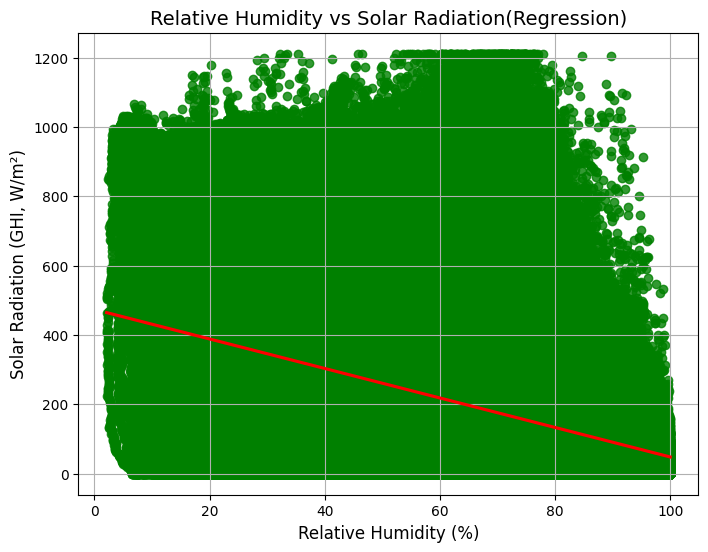

In [28]:
plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='GHI',
    title='Relative Humidity vs Solar Radiation(Regression)',
    x_label='Relative Humidity (%)',
    y_label='Solar Radiation (GHI, W/m²)',
    color='green',
    regression=True  # No regression line
)

>> #### Histogram

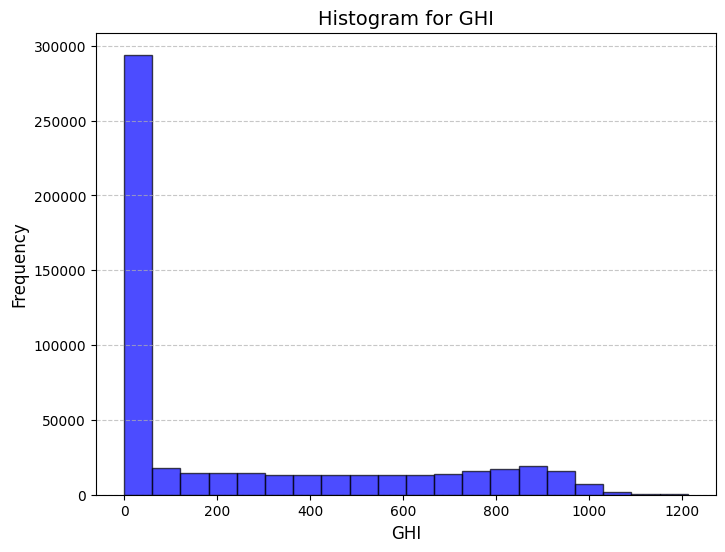

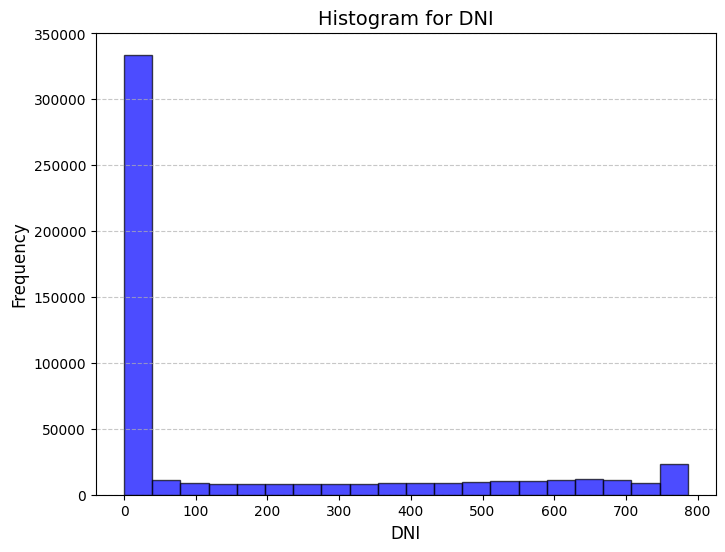

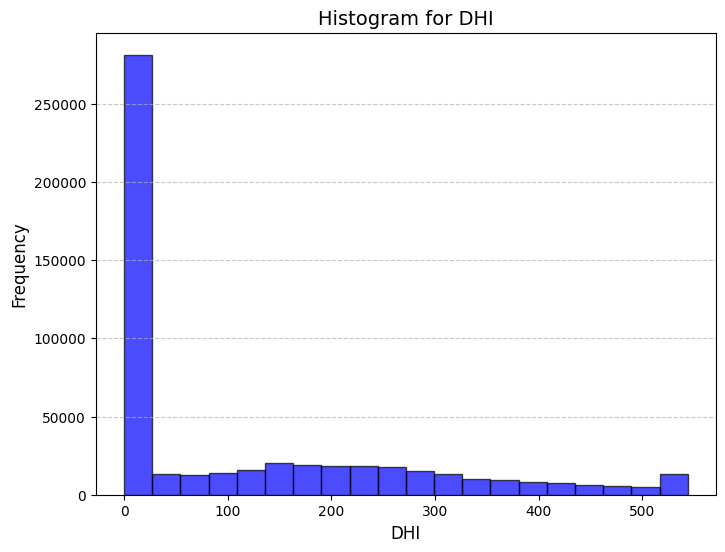

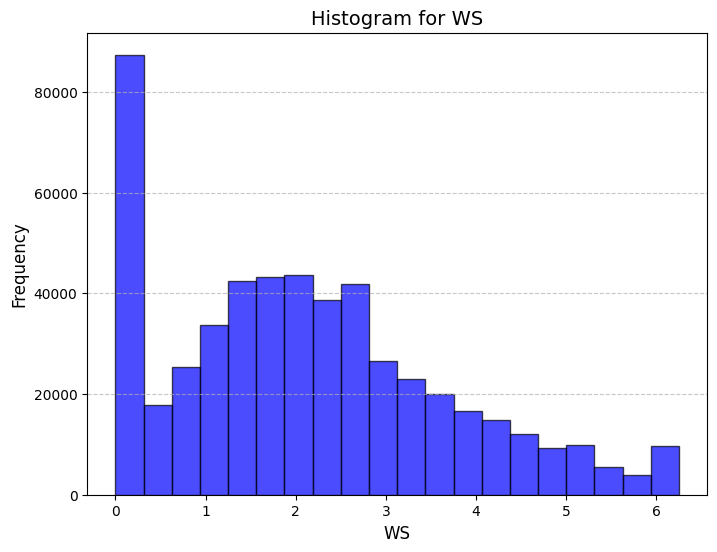

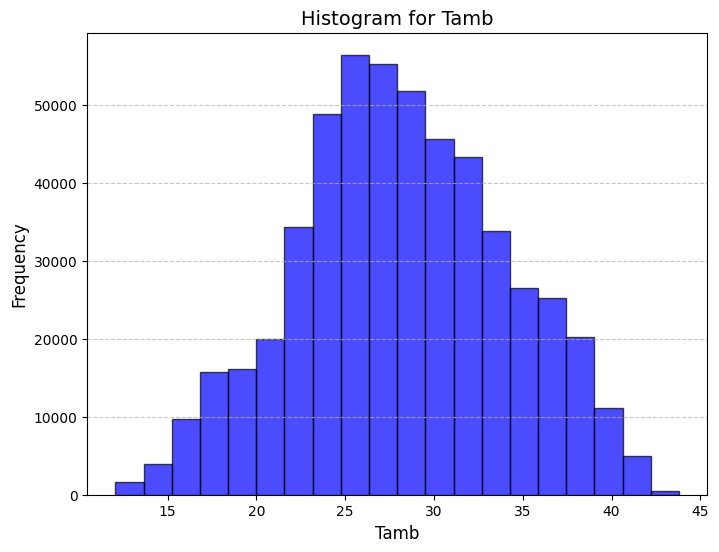

In [29]:
from scripts.histogram import plot_histograms

# Specify the columns to plot histograms for
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Call the function with specific columns
plot_histograms(data, columns=columns_to_plot, bins=20, color='blue')


>> ### z score

In [30]:
from scripts.zScore import z_score_analysis

z_score_threshold = 3
results = z_score_analysis(data, threshold=z_score_threshold)

In [31]:
results.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,Precipitation_zscore,Precipitation_outlier,TModA_zscore,TModA_outlier,TModB_zscore,TModB_outlier,Month_zscore,Month_outlier,Hour_zscore,Hour_outlier
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,...,NaN,False,-0.604165,False,-0.507908,False,0.427504,False,-1.661323,False
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,...,NaN,False,-0.604165,False,-0.507908,False,0.427504,False,-1.661323,False
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,...,NaN,False,-0.597411,False,-0.507908,False,0.427504,False,-1.661323,False
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,...,NaN,False,-0.597411,False,-0.499809,False,0.427504,False,-1.661323,False
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,...,NaN,False,-0.597411,False,-0.499809,False,0.427504,False,-1.661323,False
5,2021-08-09 00:06:00,0.0,0.0,0.0,0.0,0.0,26.2,93.8,0.0,0.4,...,NaN,False,-0.597411,False,-0.499809,False,0.427504,False,-1.661323,False
6,2021-08-09 00:07:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.0,0.0,...,NaN,False,-0.590658,False,-0.499809,False,0.427504,False,-1.661323,False
7,2021-08-09 00:08:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.7,1.3,...,NaN,False,-0.590658,False,-0.499809,False,0.427504,False,-1.661323,False
8,2021-08-09 00:09:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.4,1.1,...,NaN,False,-0.590658,False,-0.491710,False,0.427504,False,-1.661323,False
9,2021-08-09 00:10:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.5,1.1,...,NaN,False,-0.590658,False,-0.491710,False,0.427504,False,-1.661323,False


>> ### bubble chart

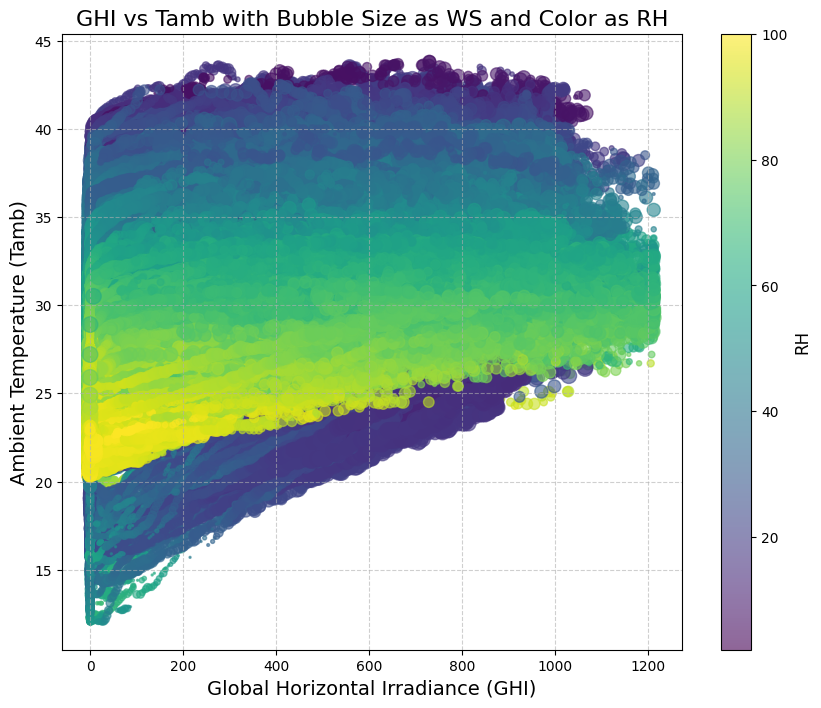

In [32]:
# Import the function from the script
from scripts.bubbleChart import plot_bubble_chart


plot_bubble_chart(
    data=data,
    x_col='GHI',  
    y_col='Tamb',  
    size_col='WS',  
    color_col='RH',  
    title='GHI vs Tamb with Bubble Size as WS and Color as RH',
    xlabel='Global Horizontal Irradiance (GHI)',
    ylabel='Ambient Temperature (Tamb)'
)